In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_path = "/Users/chaoxu/code/local-spark/Data/image_qiancheng"
ratio = 0.09
model = 'tree'
version = '6v1.0sm'

In [2]:
df = pd.read_csv("/Users/chaoxu/code/local-spark/Data/qiancheng_data/qiancheng_sample_new_merge_{0}/data.csv".format(ratio))

/Users/chaoxu/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.columns

Index([u'maxent_id', u'cracked.anomaly', u'cracked.value', u'did.15m.anomaly',
       u'did.15m.value', u'did.1d.anomaly', u'did.1d.value', u'did.1h.anomaly',
       u'did.1h.value', u'did.1m.anomaly', u'did.1m.value', u'did.5m.anomaly',
       u'did.5m.value', u'did.6h.anomaly', u'did.6h.value', u'did.7d.anomaly',
       u'did.7d.value', u'event_id', u'event_type', u'idcIP.anomaly',
       u'idcIP.value', u'ipGeo', u'ipGeo.15m.anomaly', u'ipGeo.15m.value',
       u'ipGeo.1d.anomaly', u'ipGeo.1d.value', u'ipGeo.1h.anomaly',
       u'ipGeo.1h.value', u'ipGeo.1m.anomaly', u'ipGeo.1m.value',
       u'ipGeo.5m.anomaly', u'ipGeo.5m.value', u'ipGeo.6h.anomaly',
       u'ipGeo.6h.value', u'ipGeo.7d.anomaly', u'ipGeo.7d.value', u'ipSeg24',
       u'ipSeg24.15m.anomaly', u'ipSeg24.15m.value', u'ipSeg24.1d.anomaly',
       u'ipSeg24.1d.value', u'ipSeg24.1h.anomaly', u'ipSeg24.1h.value',
       u'ipSeg24.1m.anomaly', u'ipSeg24.1m.value', u'ipSeg24.5m.anomaly',
       u'ipSeg24.5m.value', u'ipSeg2

In [4]:
df.dtypes

maxent_id                object
cracked.anomaly         float64
cracked.value            object
did.15m.anomaly         float64
did.15m.value           float64
did.1d.anomaly          float64
did.1d.value            float64
did.1h.anomaly          float64
did.1h.value            float64
did.1m.anomaly          float64
did.1m.value            float64
did.5m.anomaly          float64
did.5m.value            float64
did.6h.anomaly          float64
did.6h.value            float64
did.7d.anomaly          float64
did.7d.value            float64
event_id                 object
event_type               object
idcIP.anomaly           float64
idcIP.value              object
ipGeo                    object
ipGeo.15m.anomaly       float64
ipGeo.15m.value         float64
ipGeo.1d.anomaly        float64
ipGeo.1d.value          float64
ipGeo.1h.anomaly        float64
ipGeo.1h.value          float64
ipGeo.1m.anomaly        float64
ipGeo.1m.value          float64
                         ...   
ipSeg24.

In [5]:
df.loc[df.os == "ios"]['os'].count()

81278

In [6]:
df.loc[df.os == "android"]['os'].count()

90275

In [7]:
df['os'].unique()

array(['android', 'ios'], dtype=object)

In [11]:
df[['label']]=df[['label']].fillna(0)

In [16]:
from Pic.maxent_style import maxent_style
from Pic.maxent_font import tick_font

In [17]:
@maxent_style
def label_time(df,_path,palette=None):
    df["timestamp"] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)
    df["timestamp"] = pd.DatetimeIndex(df["timestamp"]) + timedelta(hours=8)
    df = df.sort_values(by="timestamp")
    df_label = df[["timestamp","label"]]
    df_label = df_label.set_index("timestamp")
    df_label_1 = df_label.where(df_label["label"] == 1).resample("H").count()
    df_label_0 = df_label.where(df_label["label"] == 0).resample("H").count()
    fig, axes = plt.subplots(dpi=600)
    tick_font(axes,font_size="x-small",rotation=90)
    axes.plot_date(df_label_0.index,df_label_0.values, color=next(palette), fmt="-", label="label 0")
    axes.plot_date(df_label_1.index,df_label_1.values, color=next(palette), fmt="-", label="label 1")
    axes.legend(loc='upper right')
    fig = plt.gcf()
    fig.savefig(_path,format='png')
    plt.show()

label_time


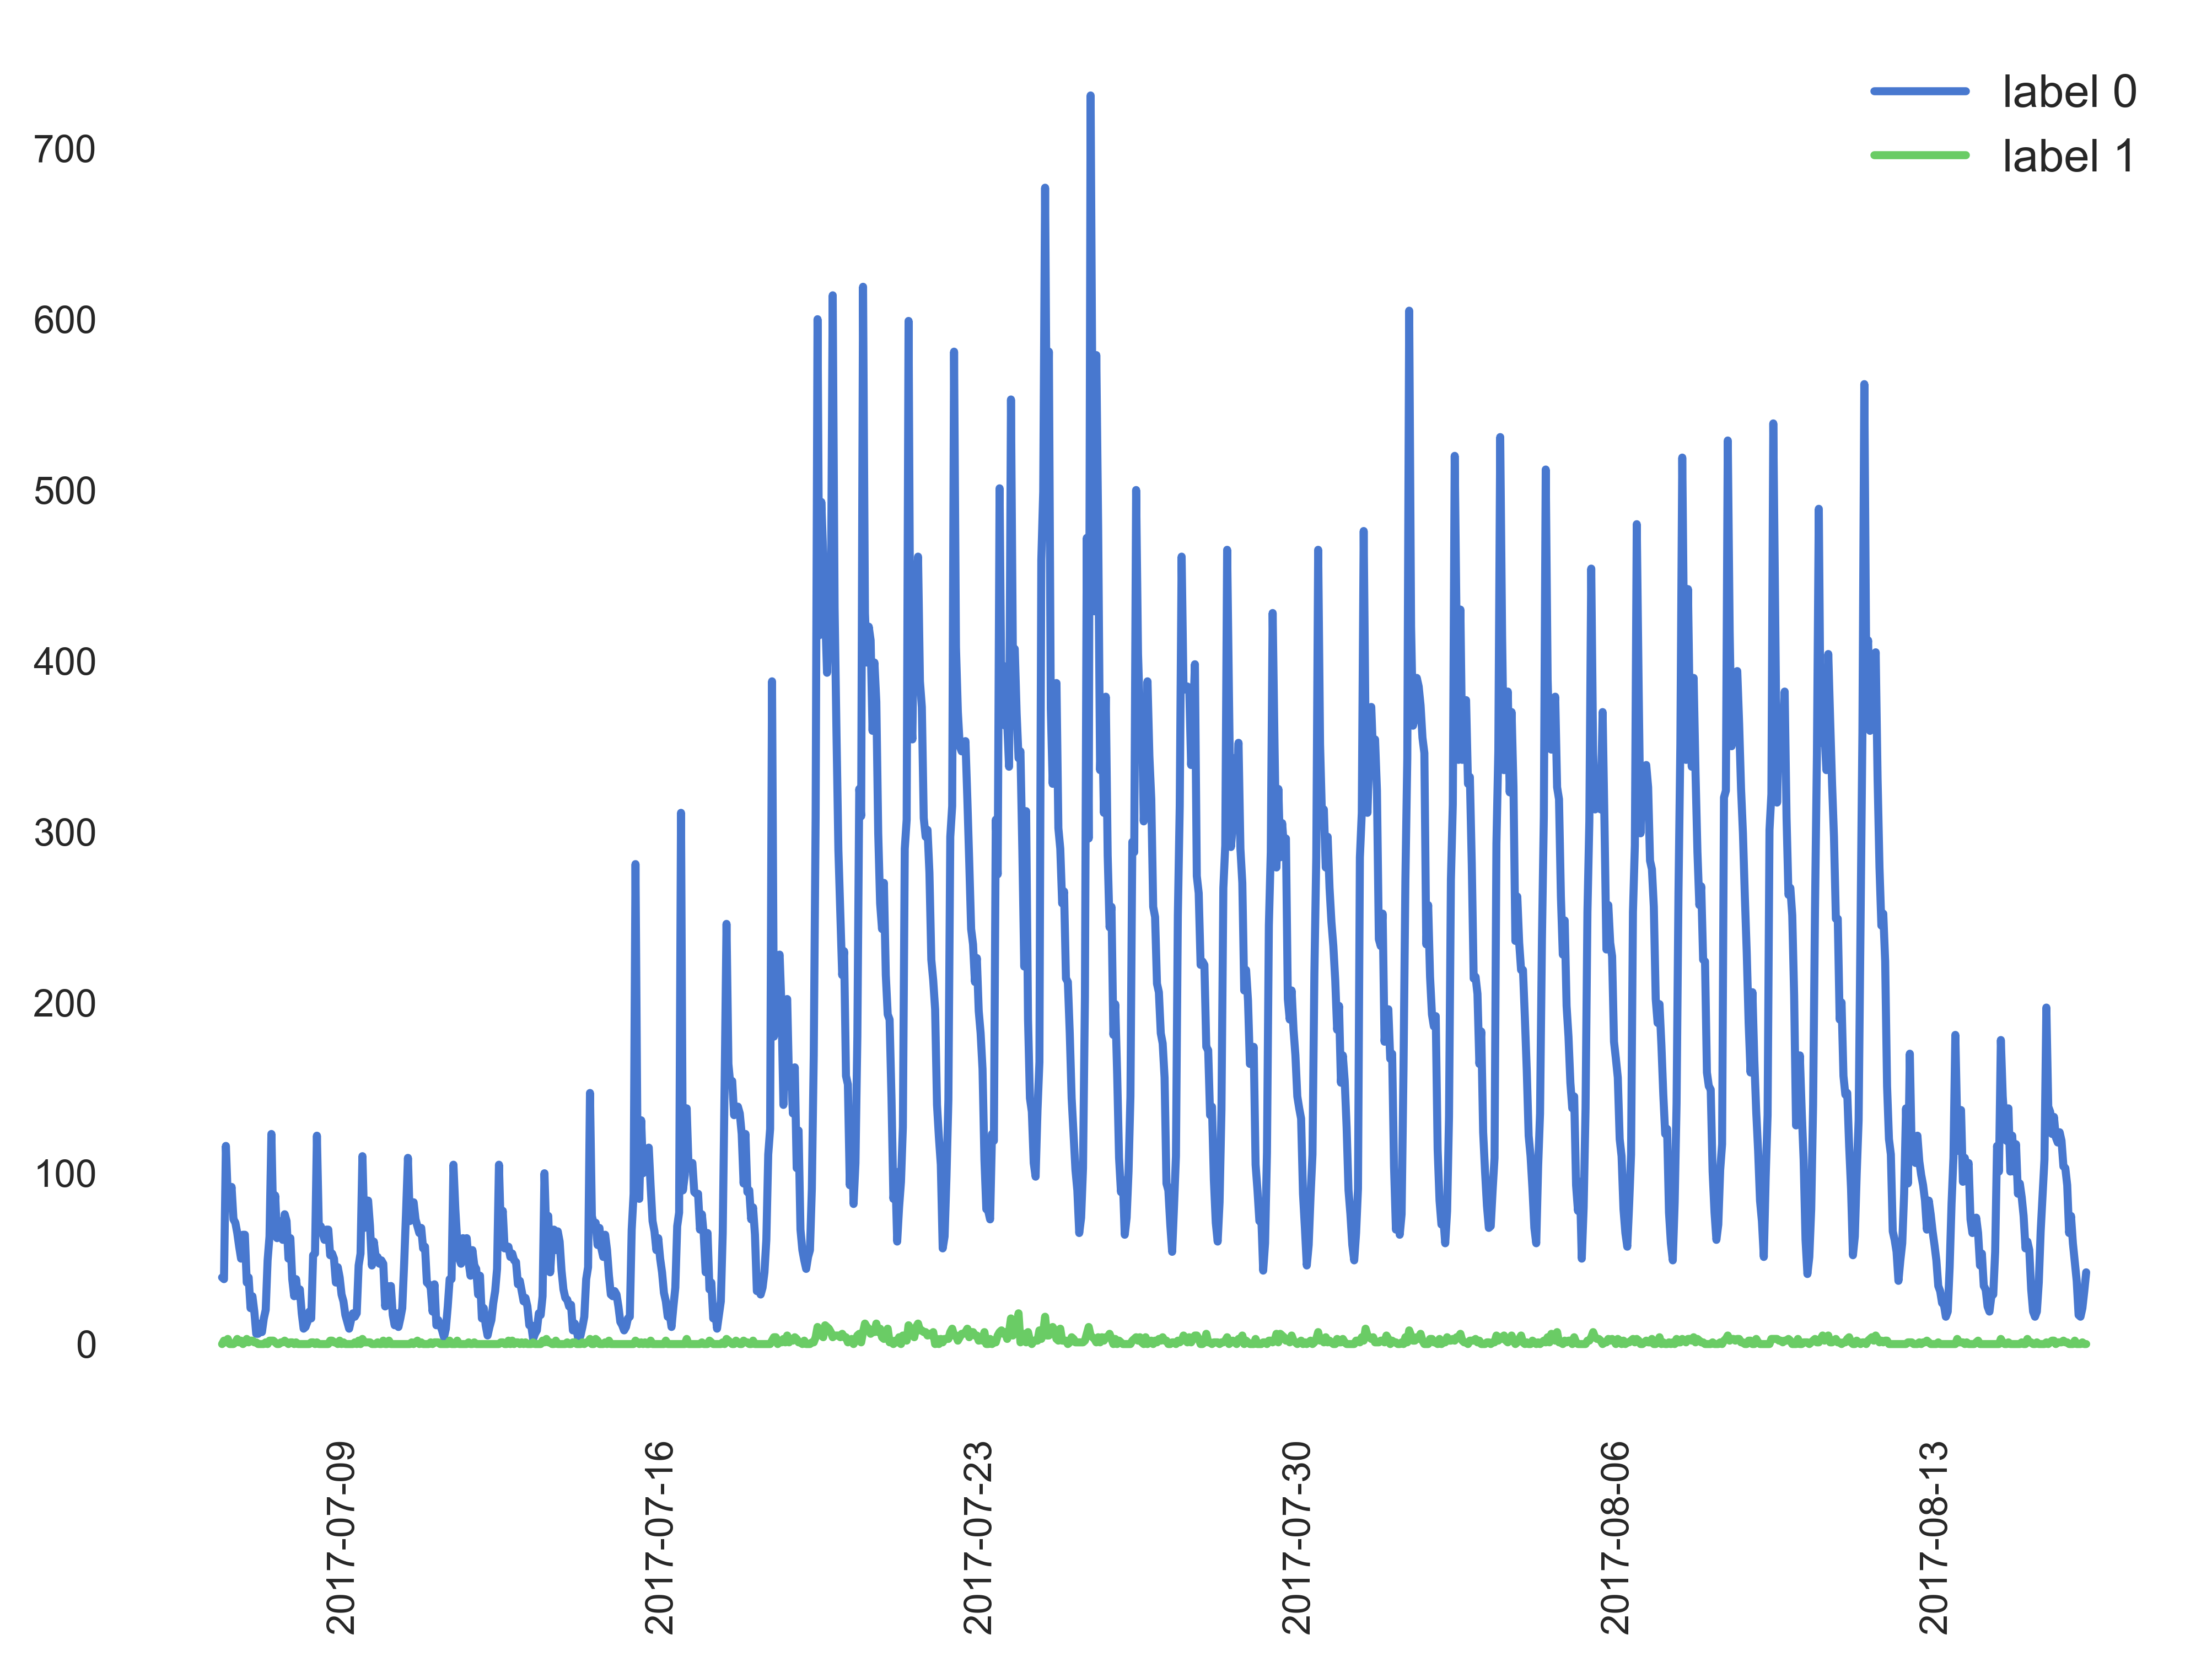

In [18]:
save_path = image_path + "/label_vs_time-{0}-{1}-{2}.png".format(version,ratio,model)
label_time(df,save_path)

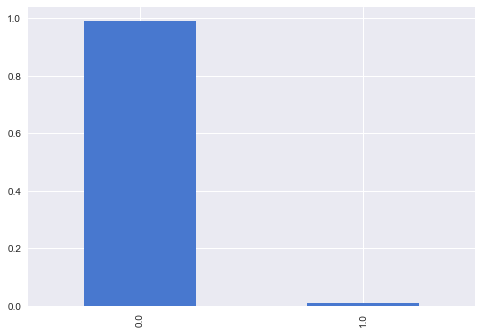

In [19]:
df.label.value_counts(normalize=True).plot(kind='bar')
plt.show()

In [20]:
df.label.value_counts(normalize=True)

0.0    0.990003
1.0    0.009997
Name: label, dtype: float64

In [21]:
df.label.value_counts()

0.0    169838
1.0      1715
Name: label, dtype: int64

In [22]:
df.maxent_id.loc[df.label == 0].drop_duplicates().count()

31052

In [23]:
df.maxent_id.loc[df.label == 1].drop_duplicates().count()

275

In [24]:
X = df.ix[:, df.columns != 'label']
y = df.ix[:, df.columns == 'label']

In [25]:
Cat_Colums = X.dtypes.pipe(lambda X: X[X=='object']).index

In [26]:
Cat_Colums

Index([u'maxent_id', u'cracked.value', u'event_id', u'event_type',
       u'idcIP.value', u'ipGeo', u'ipSeg24', u'os', u'proxyIP.value',
       u'scenario', u'uaMismatch.value'],
      dtype='object')

In [27]:
one_zro_cols = ['cracked.value','proxyIP.value','uaMismatch.value']
for i in one_zro_cols:
    print "cos is {0}".format(i)
    print df[i].value_counts(normalize=True)
    print "\n"
    print "label = 0 cos is {0}".format(i)
    print df[i].loc[df.label ==0].value_counts(normalize=True)
    print "\n"
    print "label = 1 cos is {0}".format(i)
    print df[i].loc[df.label ==1].value_counts(normalize=True)
    print "-------------\n"

cos is cracked.value
False    0.960074
True     0.039926
Name: cracked.value, dtype: float64


label = 0 cos is cracked.value
False    0.960325
True     0.039675
Name: cracked.value, dtype: float64


label = 1 cos is cracked.value
False    0.935277
True     0.064723
Name: cracked.value, dtype: float64
-------------

cos is proxyIP.value
False    0.941016
True     0.058984
Name: proxyIP.value, dtype: float64


label = 0 cos is proxyIP.value
False    0.940922
True     0.059078
Name: proxyIP.value, dtype: float64


label = 1 cos is proxyIP.value
False    0.950292
True     0.049708
Name: proxyIP.value, dtype: float64
-------------

cos is uaMismatch.value
False    0.980105
True     0.019895
Name: uaMismatch.value, dtype: float64


label = 0 cos is uaMismatch.value
False    0.98011
True     0.01989
Name: uaMismatch.value, dtype: float64


label = 1 cos is uaMismatch.value
False    0.979592
True     0.020408
Name: uaMismatch.value, dtype: float64
-------------



In [28]:
import re
anormaly = re.compile('.*anomaly$')
anormaly_match = np.vectorize(lambda x:bool(anormaly.match(x)))
anormaly_cols = df.columns.values[anormaly_match(df.columns.values)]

In [29]:
for col in anormaly_cols:
#     print "label = 0 --> col is {0} \n".format(col)
    df0_desc = df.loc[df.label == 0][col].describe(percentiles=[.05,.1,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])
#     print "label = 1 --> col is {0} \n".format(col)
    df1_desc = df.loc[df.label == 1][col].describe(percentiles=[.05,.1,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])
    df_diff = df0_desc - df1_desc
    print "sub 0 vs 1 of {0}".format(col)
    print df_diff
    df_diff = df_diff.drop(['count','mean','std','min','max']).abs()
    row_name = df_diff.idxmax()
    print "!!!max Percentile Values from {0}".format(row_name)
    print "-----\n"

sub 0 vs 1 of cracked.anomaly
count    168114.0
mean          0.0
std           0.0
min           0.0
5%            0.0
10%           0.0
25%           0.0
30%           0.0
35%           0.0
40%           0.0
45%           0.0
50%           0.0
55.0%         0.0
60%           0.0
65%           0.0
70%           0.0
75%           0.0
80%           0.0
85%           0.0
90%           0.0
95%           0.0
max           0.0
Name: cracked.anomaly, dtype: float64
!!!max Percentile Values from 5%
-----

sub 0 vs 1 of did.15m.anomaly
count    167852.000000
mean          0.096611
std           6.746484
min           0.000000
5%            0.000000
10%           0.000000
25%           0.000000
30%           0.000000
35%           0.000000
40%           0.000000
45%           0.000000
50%           0.000000
55.0%         0.000000
60%           0.000000
65%           0.000000
70%           0.000000
75%           0.000000
80%           0.000000
85%           0.000000
90%           0.000000
95%   

In [30]:
count_ = re.compile('.*counts$')
count_match = np.vectorize(lambda x:bool(count_.match(x)))
count_cols = df.columns.values[count_match(df.columns.values)]

In [31]:
for col in count_cols:
#     print "label = 0 --> col is {0} \n".format(col)
    df0_desc = df.loc[df.label == 0][col].describe(percentiles=[.05,.1,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])
#     print "label = 1 --> col is {0} \n".format(col)
    df1_desc = df.loc[df.label == 1][col].describe(percentiles=[.05,.1,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95])
    df_diff = df0_desc - df1_desc
    print "sub 0 vs 1 of {0}".format(col)
    print df_diff
    df_diff = df_diff.drop(['count','mean','std','min','max']).abs()
    row_name = df_diff.idxmax()
    print "!!!max Percentile Values from {0}".format(row_name)
    print "-----\n"

sub 0 vs 1 of mcid_counts
count    168123.000000
mean         -0.080251
std           3.571642
min           0.000000
5%            0.000000
10%           0.000000
25%           0.000000
30%           0.000000
35%           0.000000
40%           0.000000
45%           0.000000
50%           0.000000
55.0%         0.000000
60%           0.000000
65%           0.000000
70%           0.000000
75%           0.000000
80%           0.000000
85%           0.000000
90%           0.000000
95%          -3.000000
max         142.000000
Name: mcid_counts, dtype: float64
!!!max Percentile Values from 95%
-----

sub 0 vs 1 of imei_counts
count    168123.000000
mean          0.311250
std           4.399748
min           0.000000
5%            0.000000
10%           0.000000
25%           0.000000
30%           0.000000
35%           0.000000
40%           0.000000
45%           0.000000
50%           1.000000
55.0%         1.000000
60%           0.000000
65%           0.000000
70%           0.000000

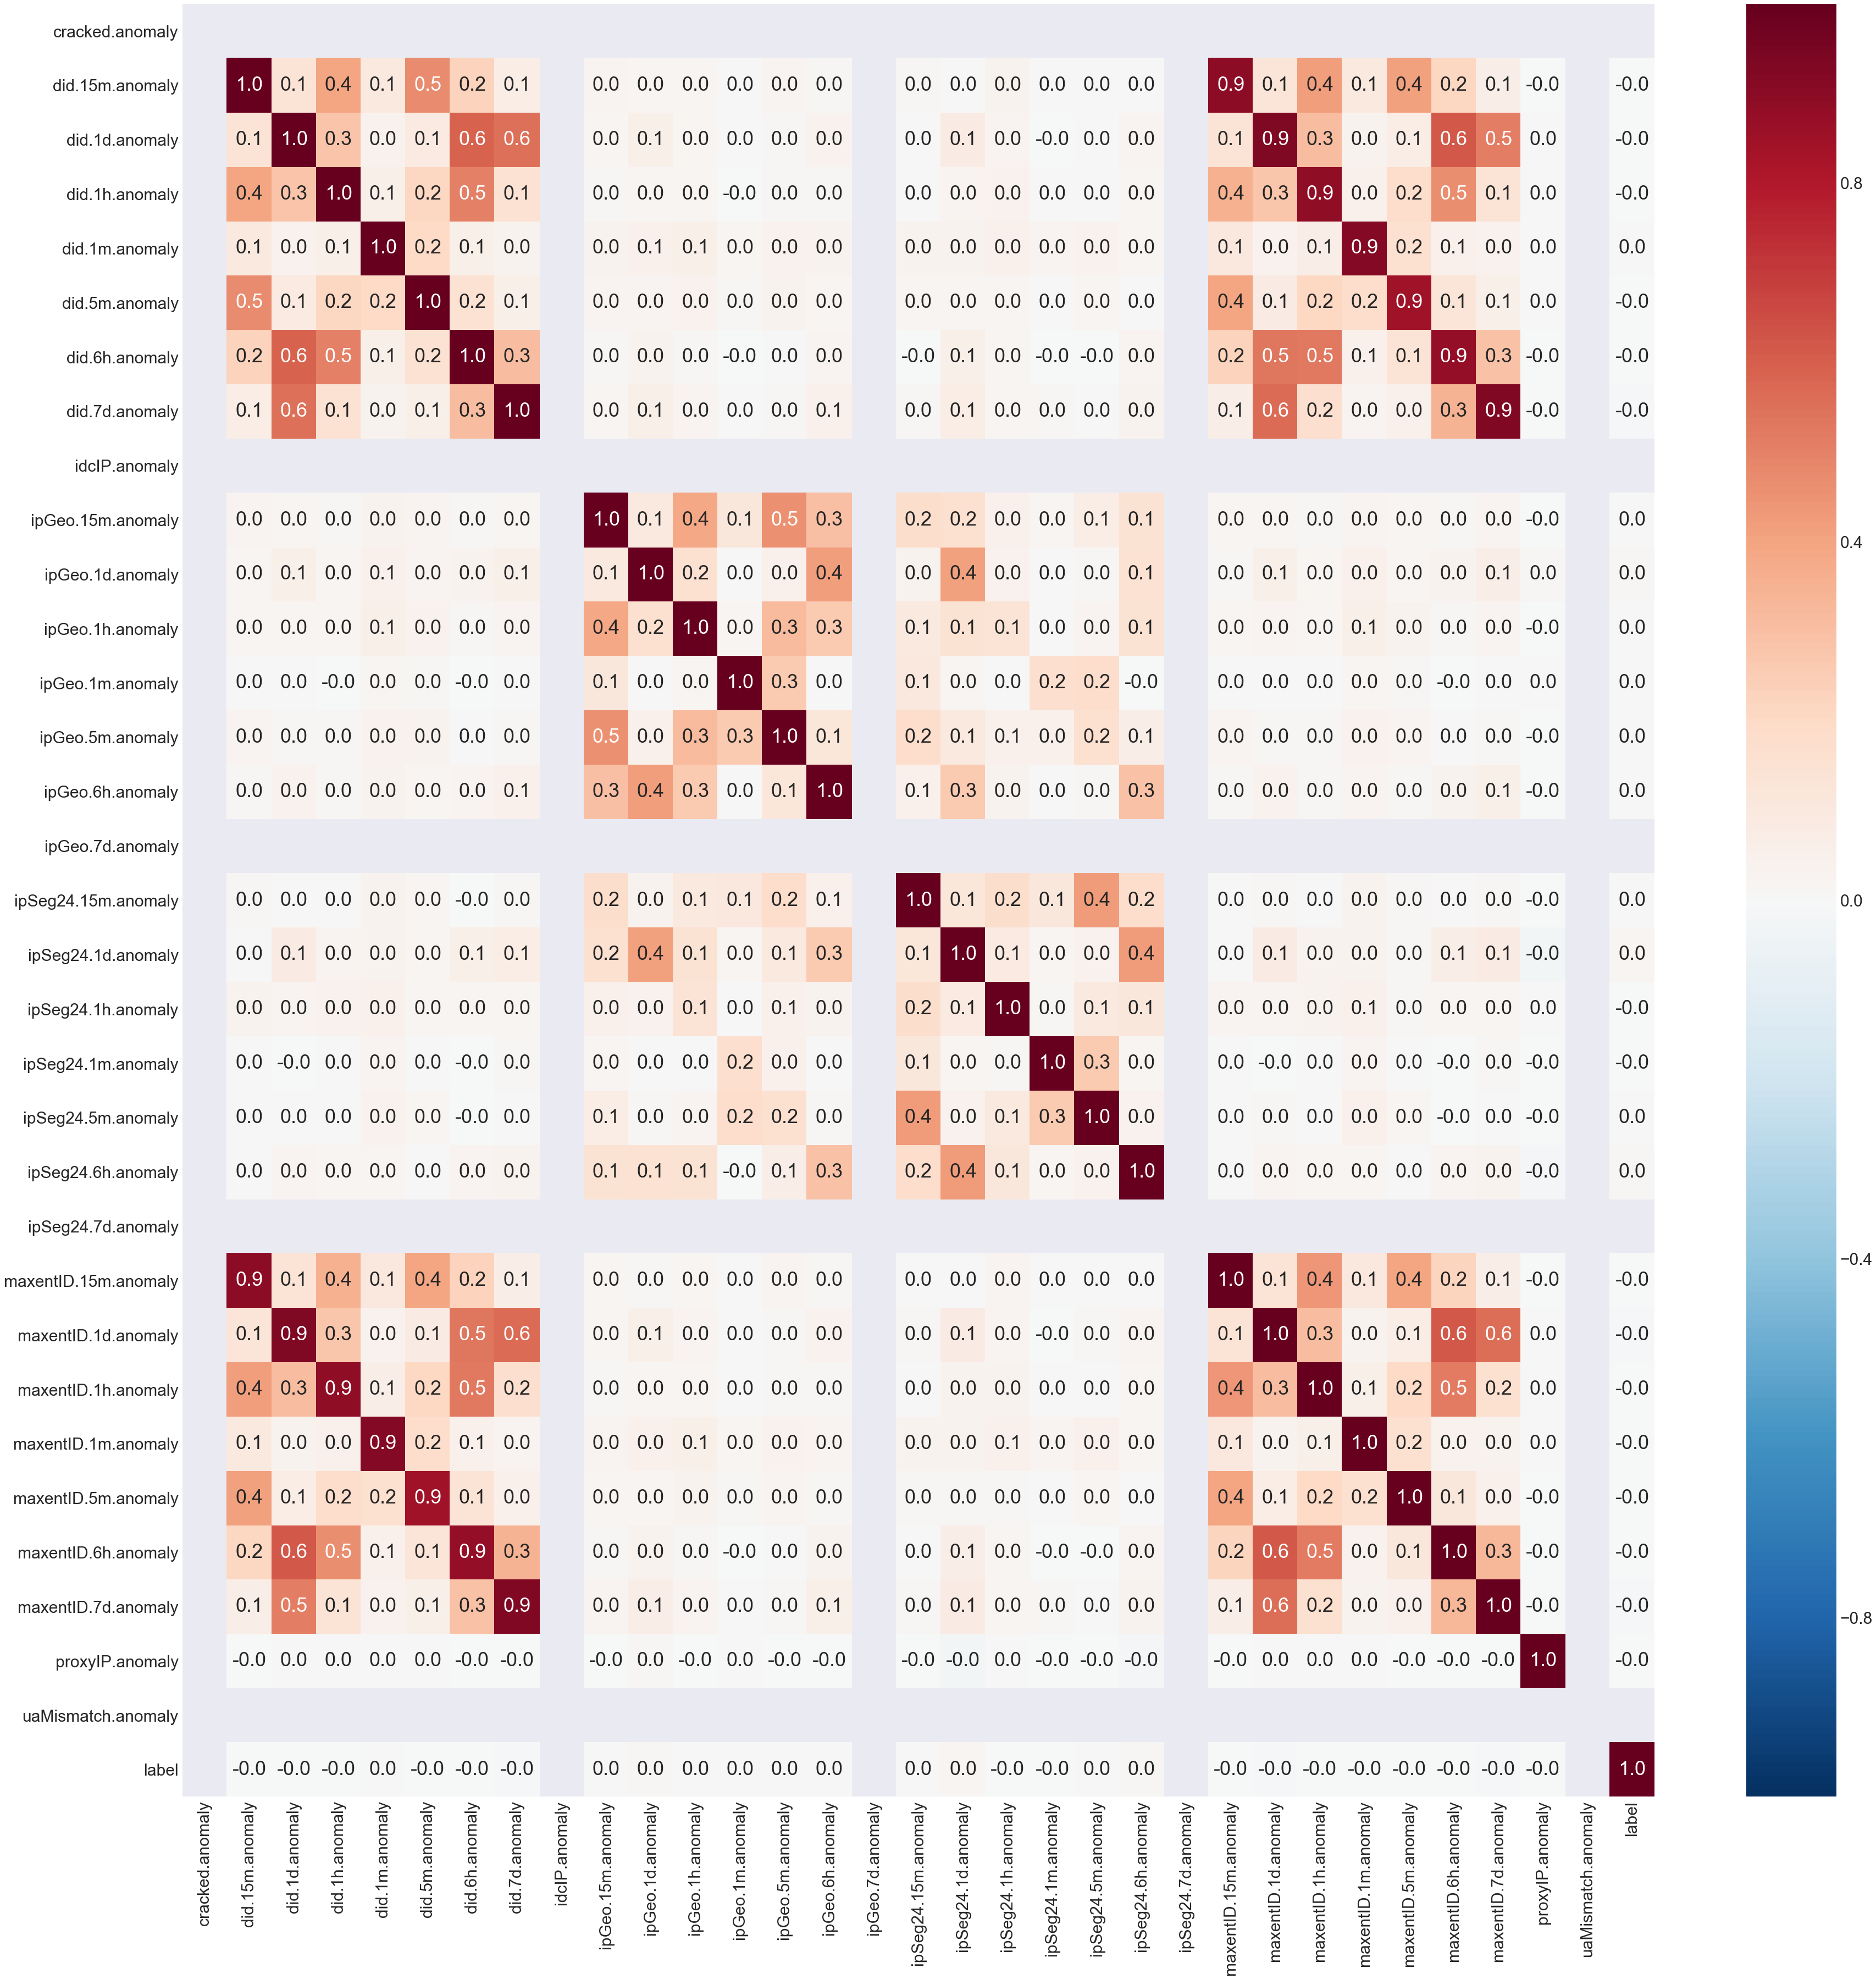

In [32]:
import seaborn as sns
sns.set(font_scale=3.0)
fig,ax= plt.subplots(figsize=(60,60))
# fig,ax= plt.subplots(dpi=400)
X_anormaly = X[anormaly_cols]
df_anormaly = pd.concat([X_anormaly,y],axis=1)
# sns.heatmap(df_anormaly.corr(),ax=ax)
sns.heatmap(df_anormaly.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

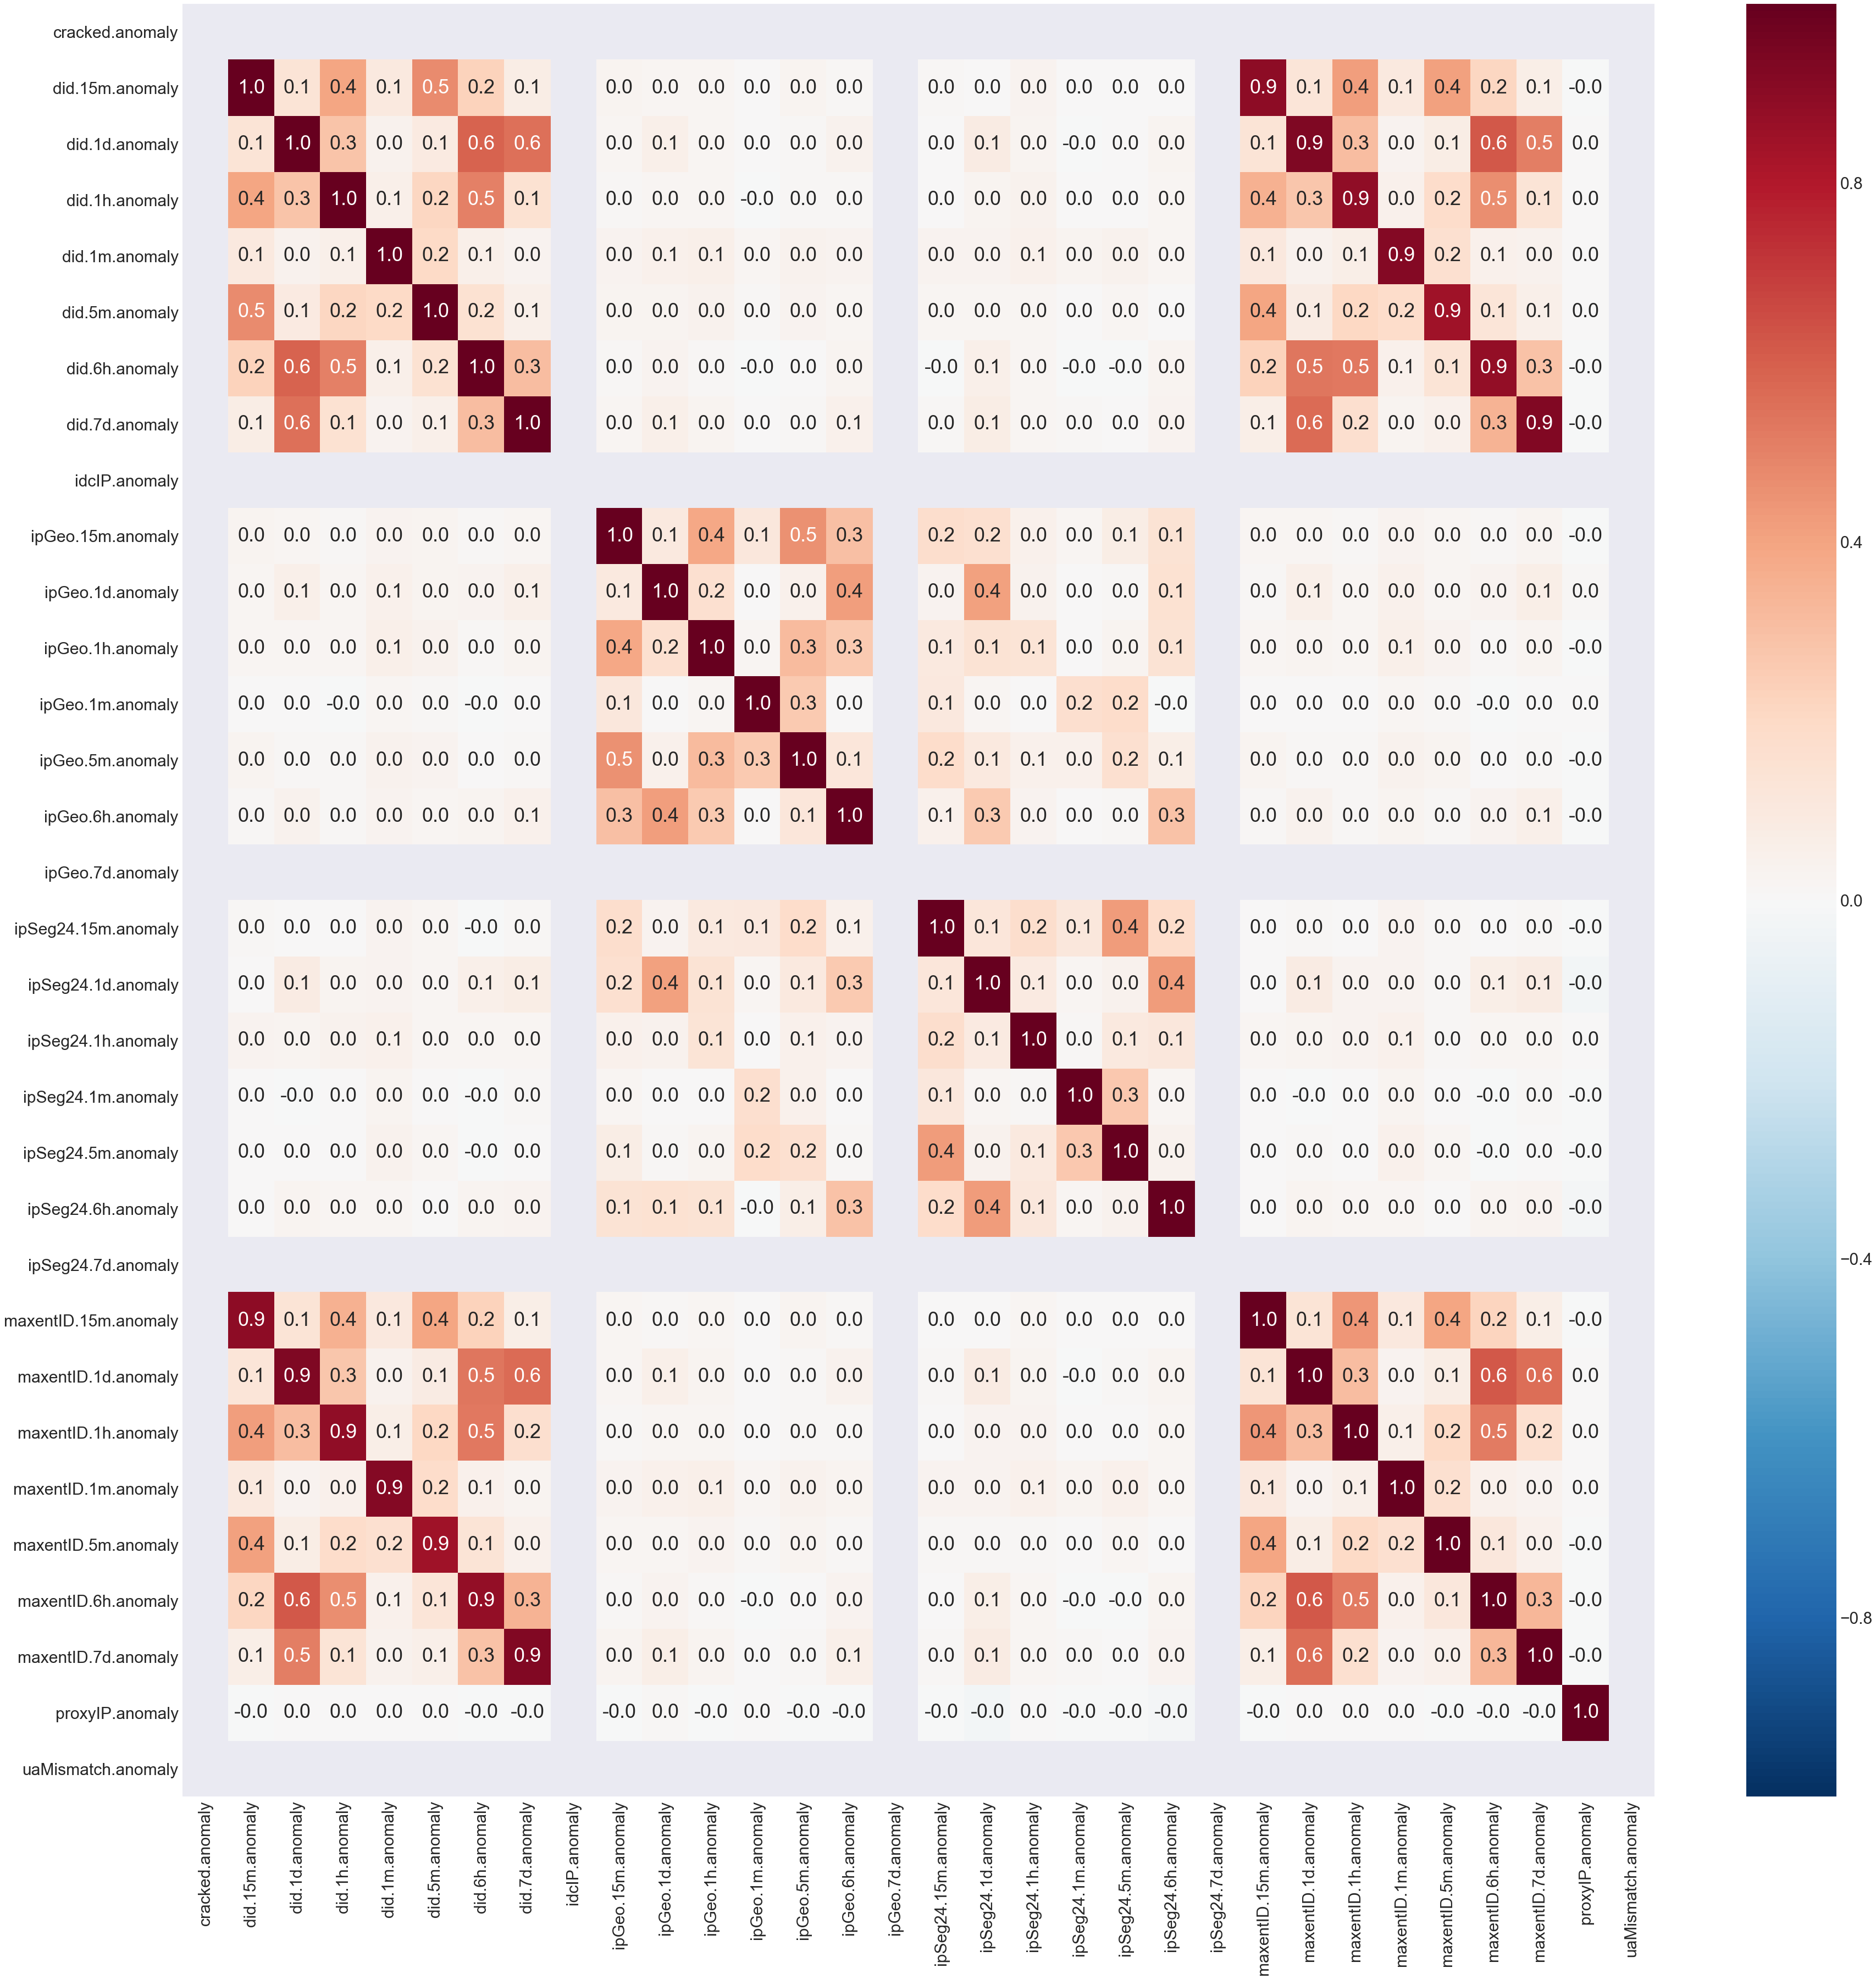

In [38]:

fig,ax= plt.subplots(figsize=(60,60))
# fig,ax= plt.subplots(dpi=400)
df_anormaly_0 = df.loc[df.label ==0][anormaly_cols]
# sns.heatmap(df_anormaly.corr(),ax=ax)
sns.heatmap(df_anormaly_0.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

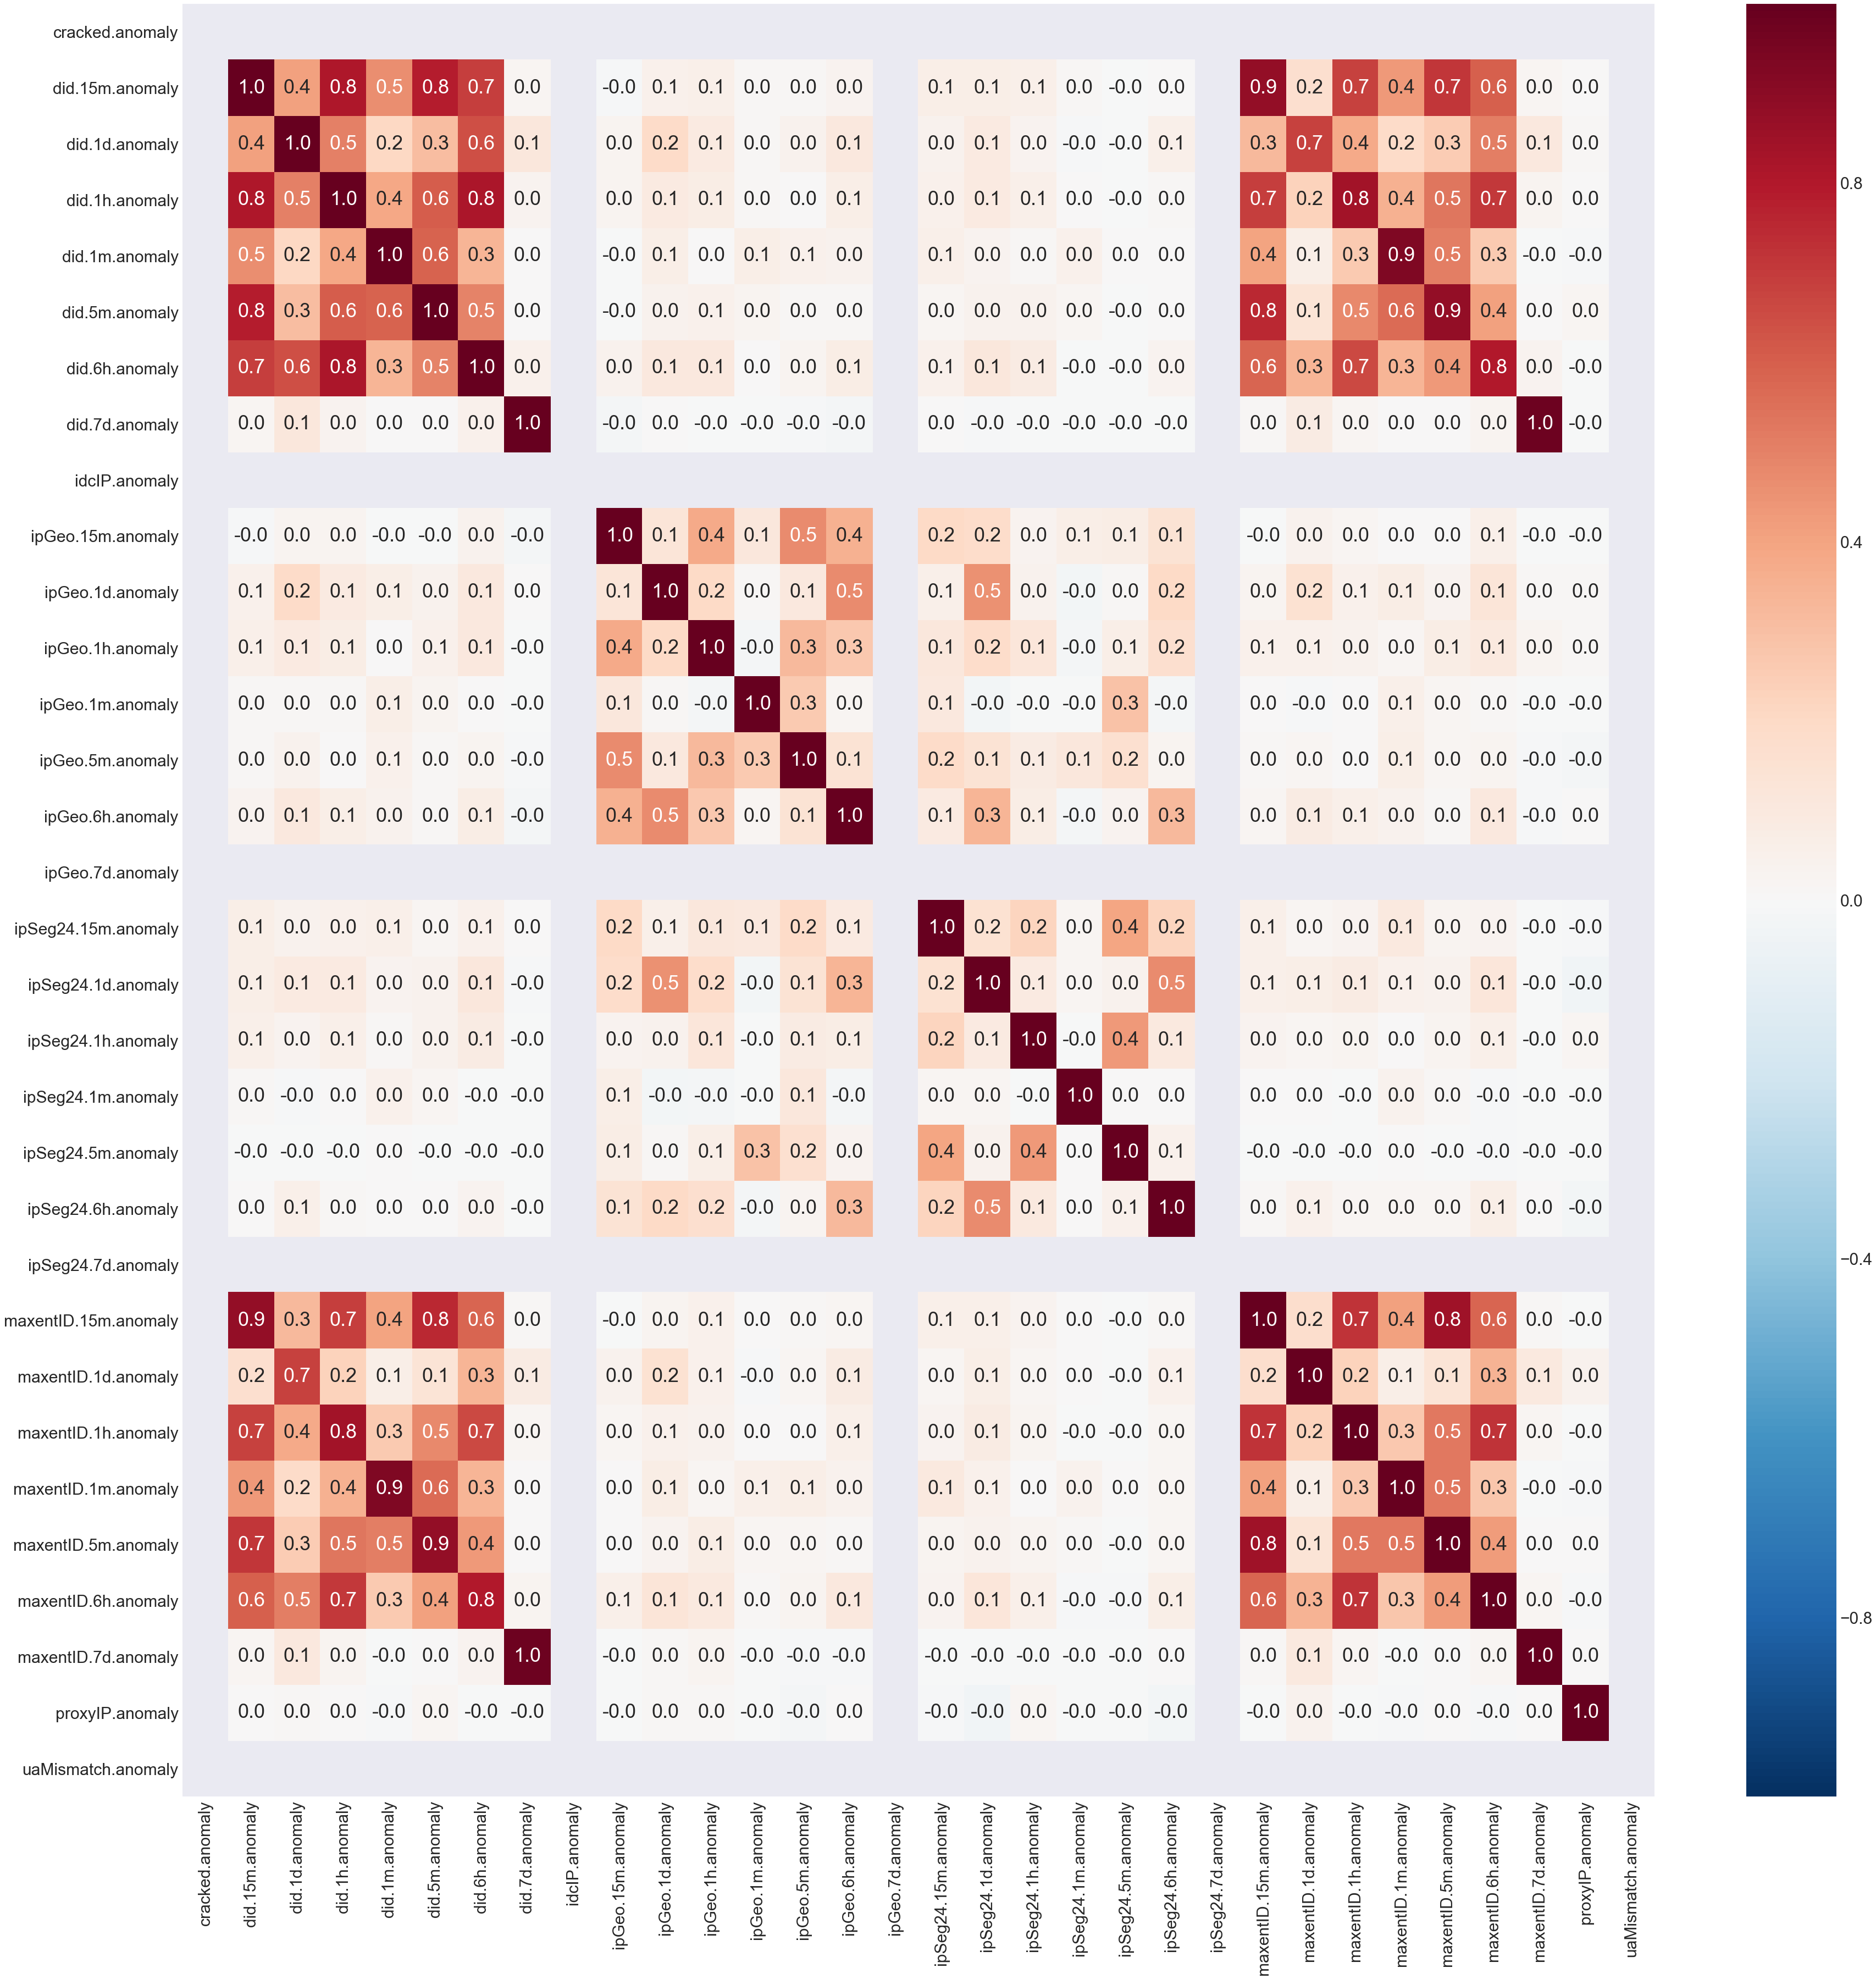

In [39]:
fig,ax= plt.subplots(figsize=(60,60))
# fig,ax= plt.subplots(dpi=400)
df_anormaly_1 = df.loc[df.label == 1][anormaly_cols]
# sns.heatmap(df_anormaly.corr(),ax=ax)
sns.heatmap(df_anormaly_1.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

In [33]:
# float_cols = X.dtypes.pipe(lambda X: X[X=='float']).index
# pic_nums = float_cols.shape[0]
# import matplotlib.gridspec as gridspec
# import seaborn as sns
# plt.figure(figsize=(12,28*4))
# gs = gridspec.GridSpec(pic_nums, 1)
# for i, cn in enumerate(df[float_cols]):
#     print("cn",i,cn)
#     ax = plt.subplot(gs[i])
#     sns.distplot(df[cn][df.label == 1], bins=5)
#     sns.distplot(df[cn][df.label == 0], bins=5)
#     ax.set_xlabel('')
#     ax.set_title('histogram of feature: ' + str(cn))
# plt.show()

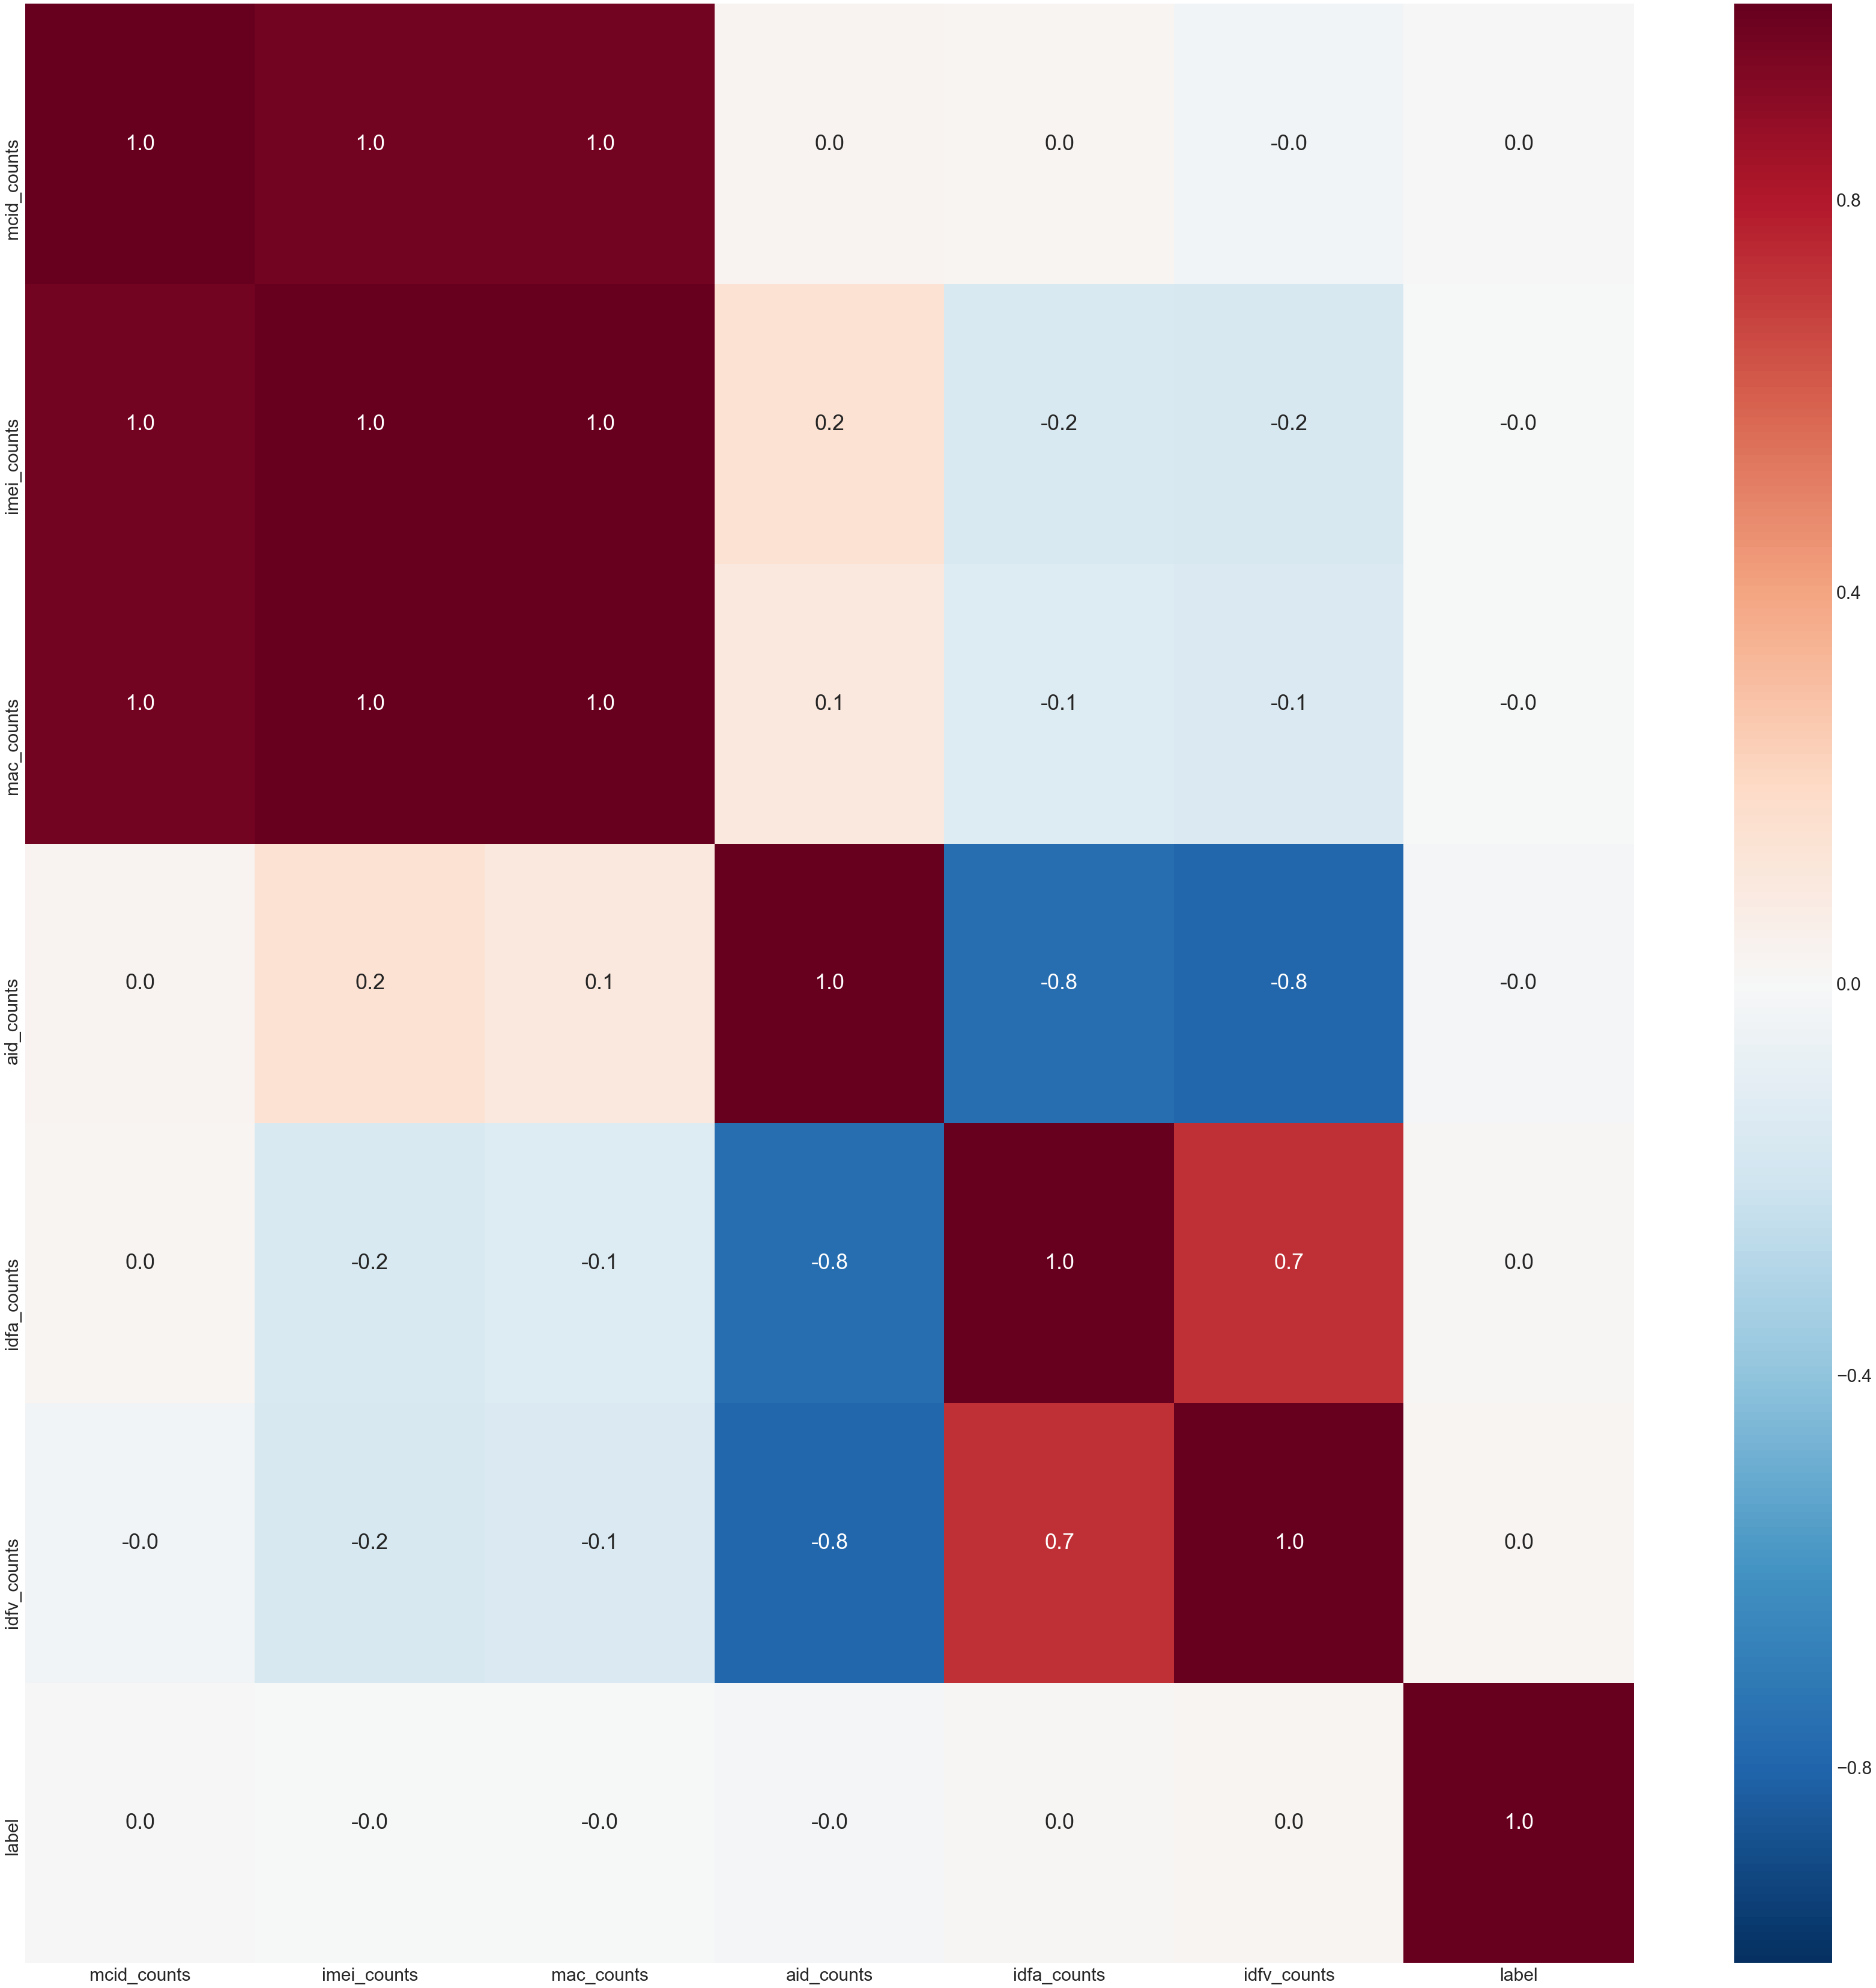

In [34]:
fig,ax= plt.subplots(figsize=(60,60))
X_count = df[count_cols]
df_count = pd.concat([X_count,y],axis=1)
sns.heatmap(df_count.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

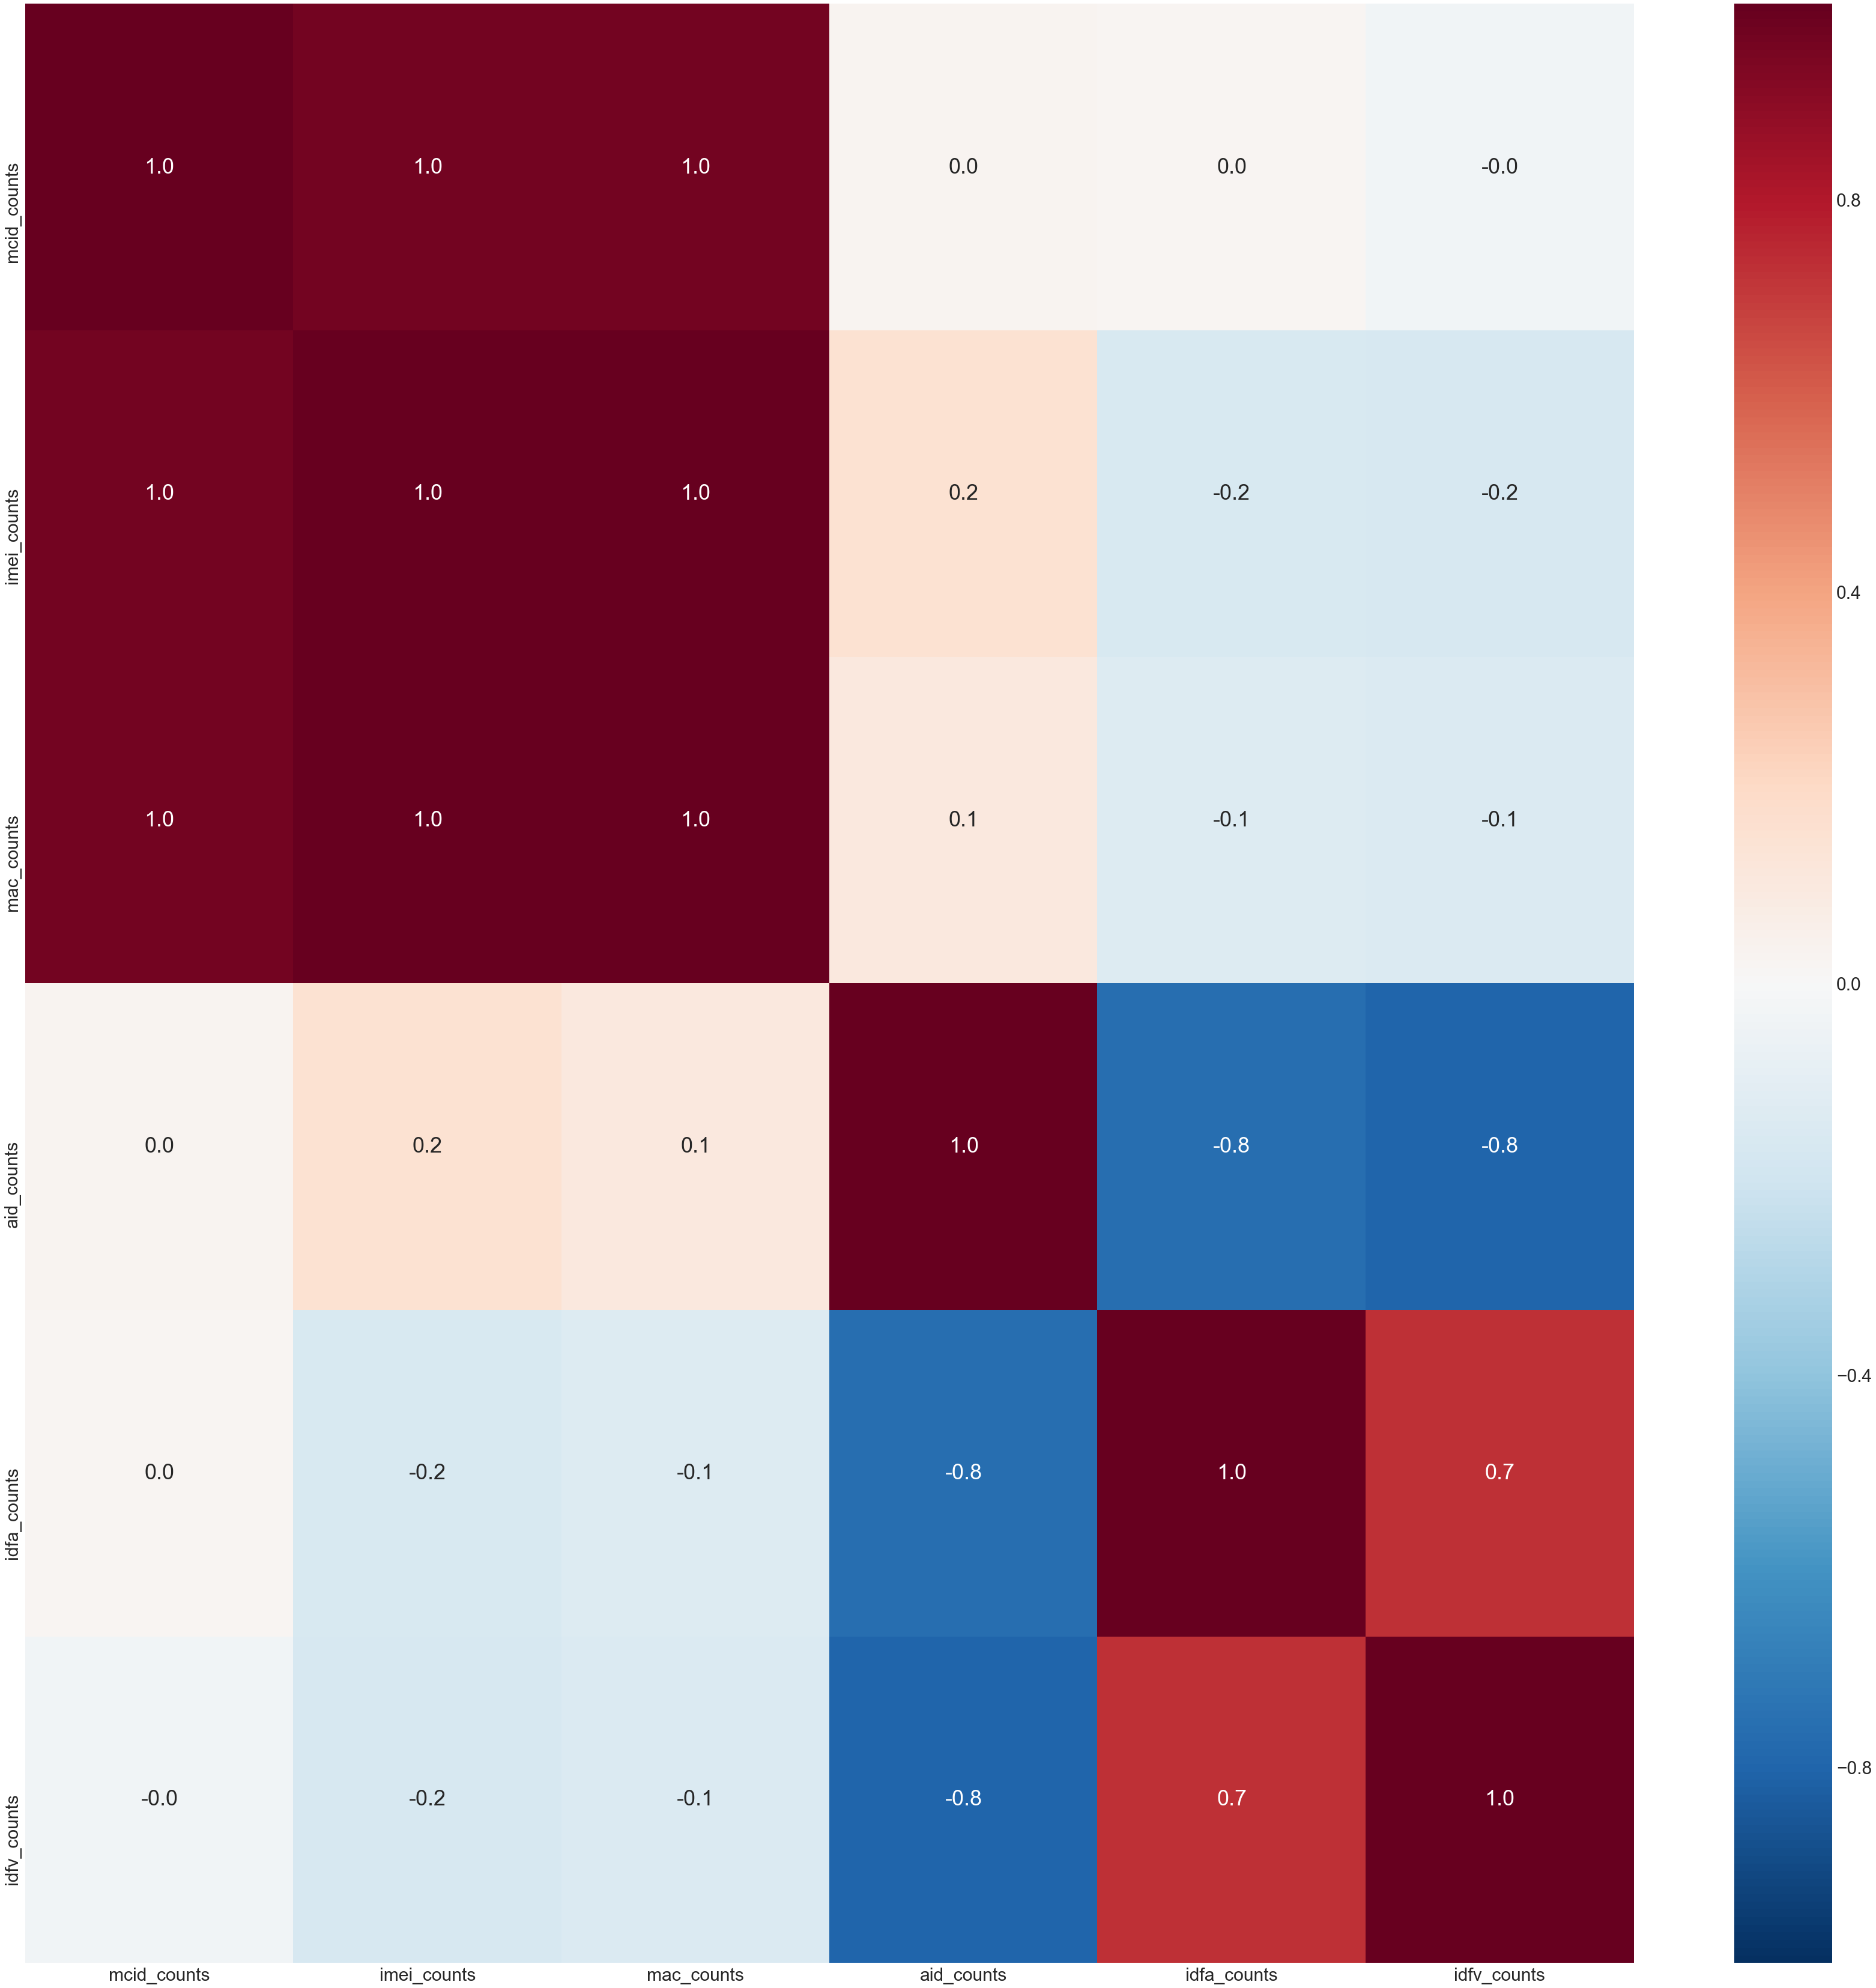

In [36]:
fig,ax= plt.subplots(figsize=(60,60))
df_count_0 = df[count_cols].loc[df.label == 0]
# X_count_0 = df_count_0.ix[:, df_count_0.columns != 'label']
# y_count_0 = df_count_0.ix[:, df_count_0.columns == 'label']
# df_count = pd.concat([X_count_0,y_count_0],axis=1)
sns.heatmap(df_count_0.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()

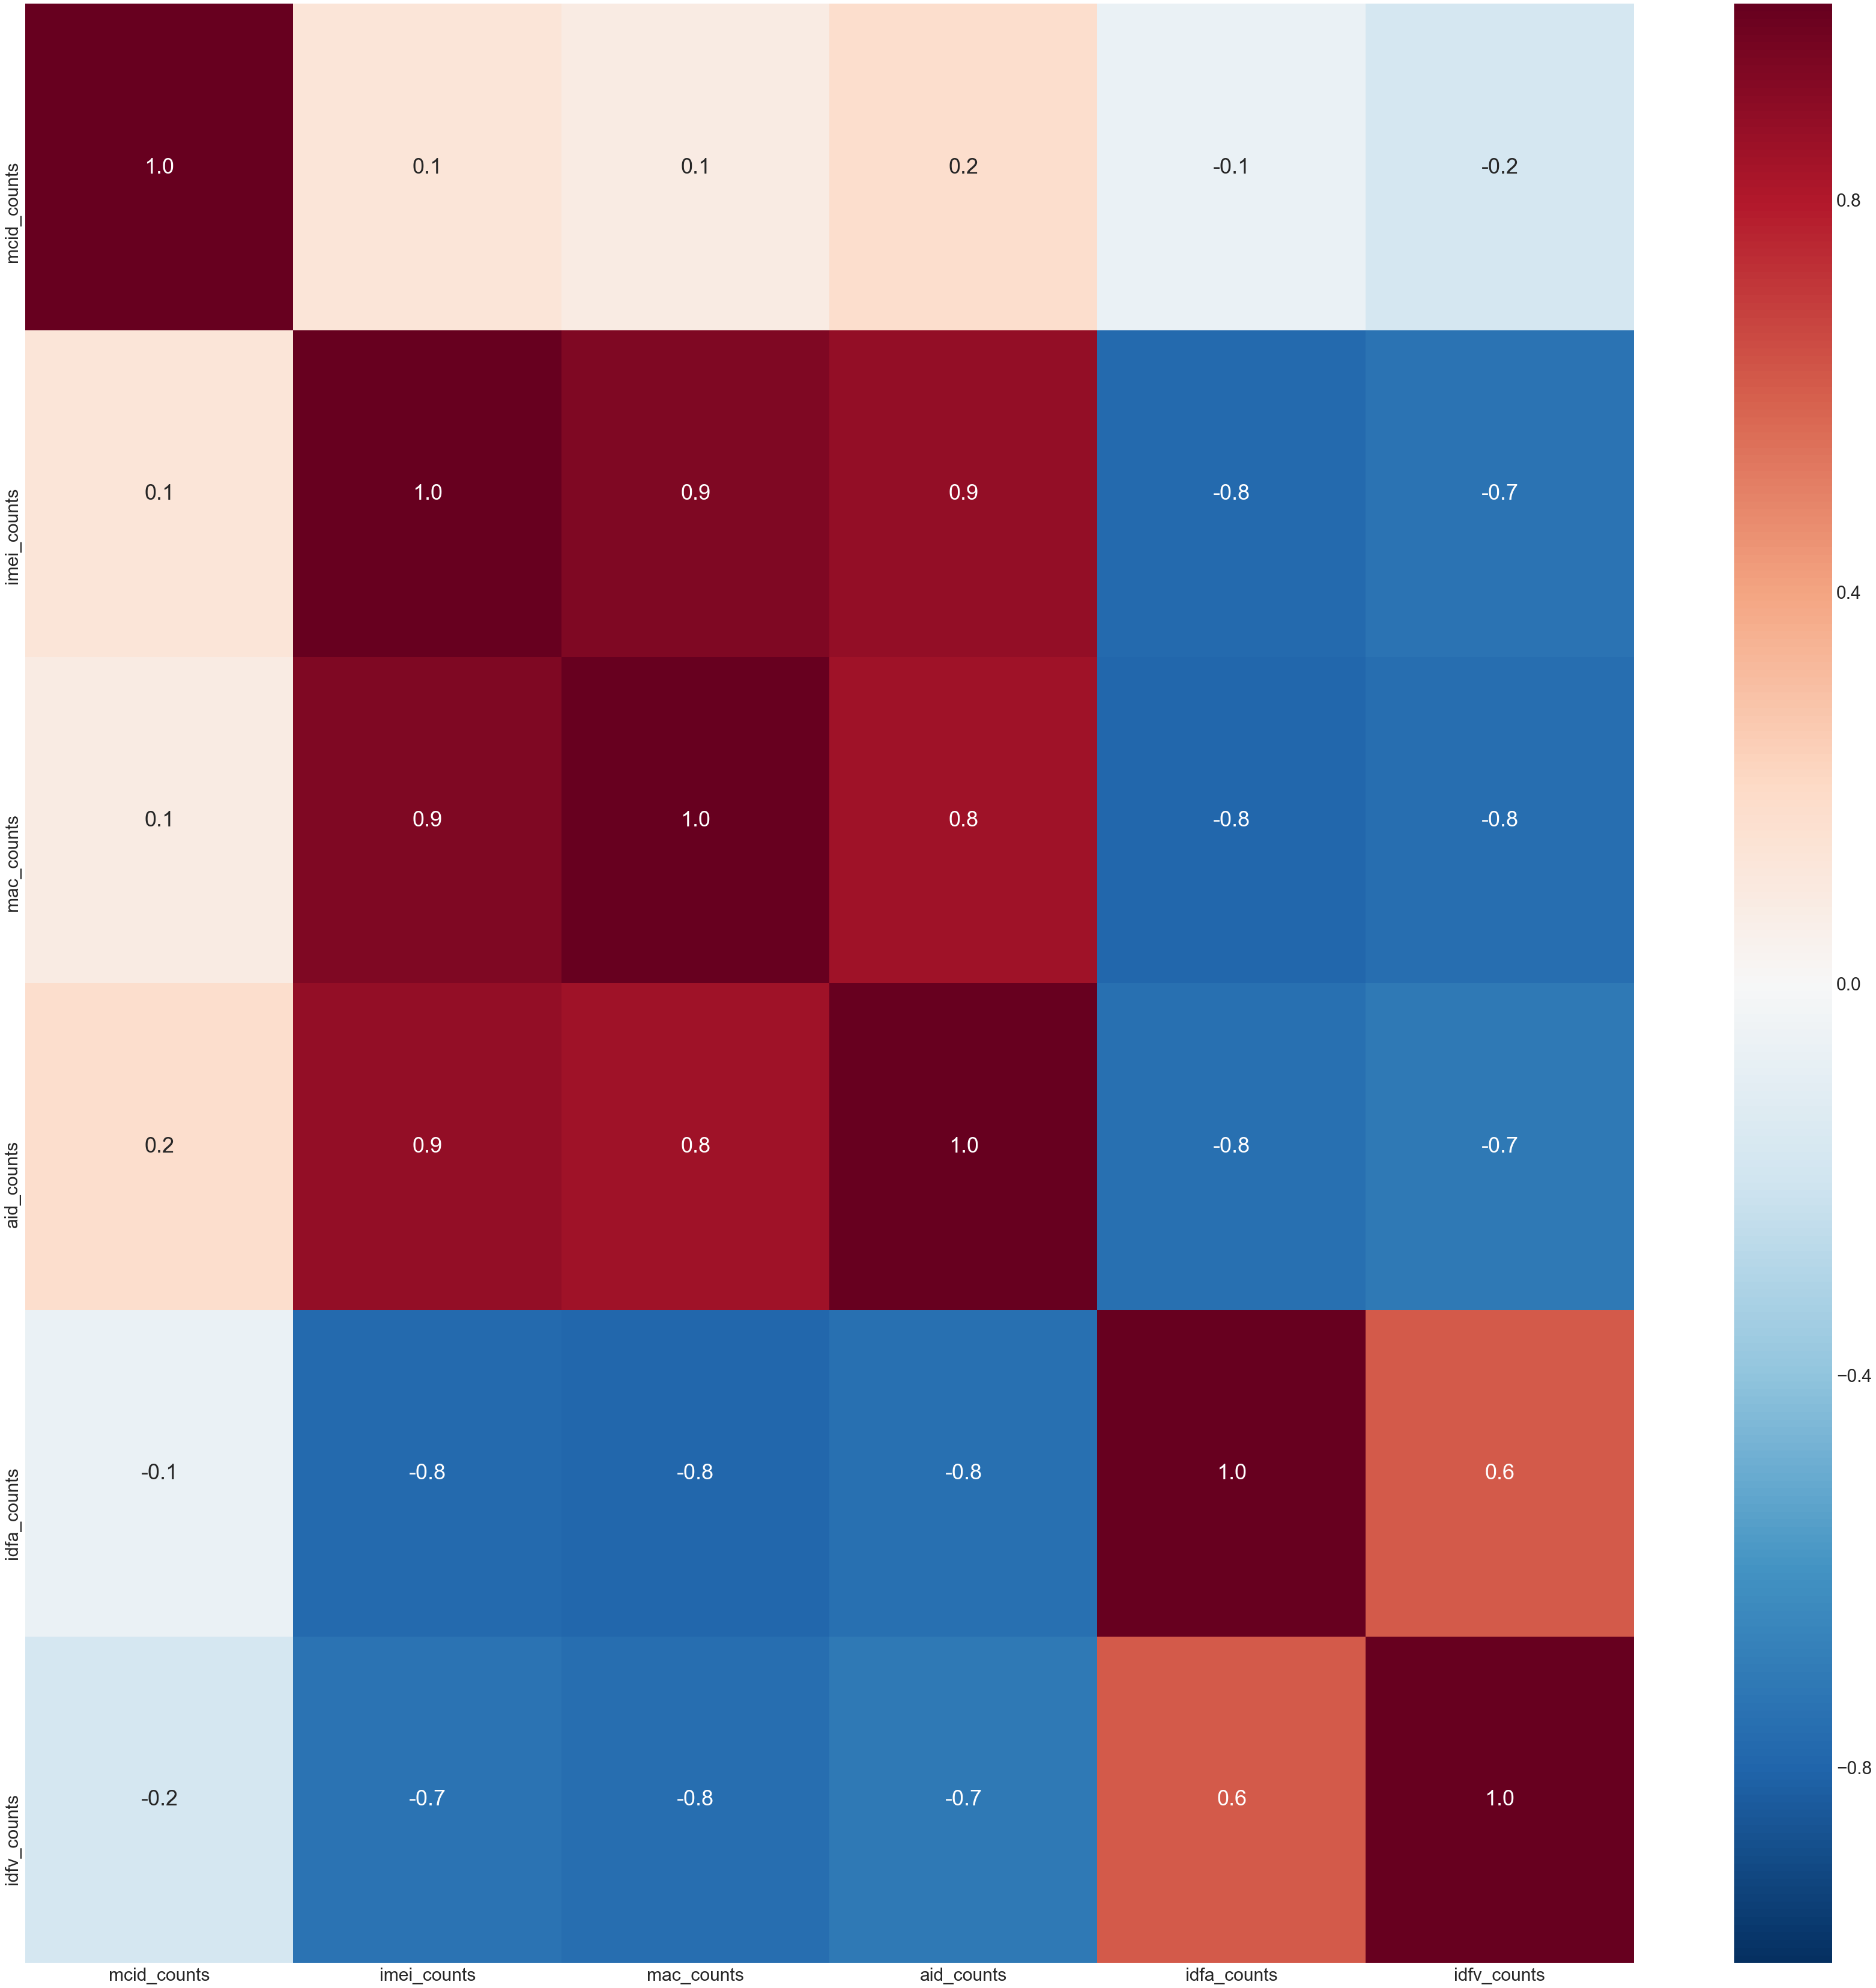

In [37]:
fig,ax= plt.subplots(figsize=(60,60))
df_count_1 = df[count_cols].loc[df.label == 1]
# X_count_0 = df_count_0.ix[:, df_count_0.columns != 'label']
# y_count_0 = df_count_0.ix[:, df_count_0.columns == 'label']
# df_count = pd.concat([X_count_0,y_count_0],axis=1)
sns.heatmap(df_count_1.corr(),ax=ax,annot=True,fmt='.1f')
plt.show()